In [13]:
import cv2
import numpy as np
import  kociemba
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
import skimage as sk
import skimage.io as skio
import scipy.cluster
import sklearn.cluster

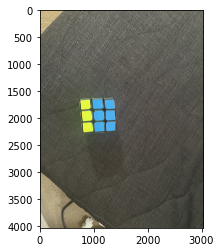

In [14]:
image = cv2.imread('IMG_0713.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

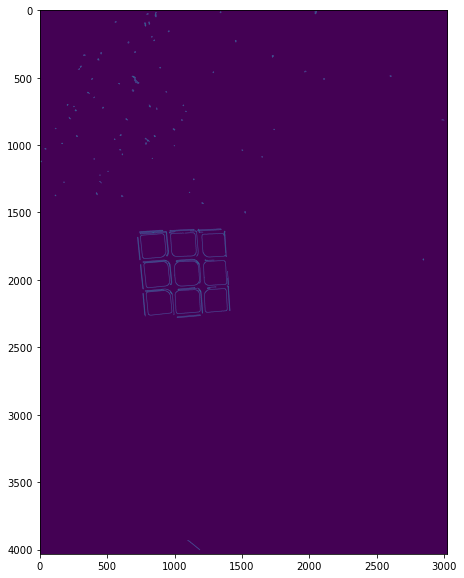

In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
low_threshold = 100
high_threshold = 550
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.figure(figsize=(10,10))
plt.imshow(edges)

23

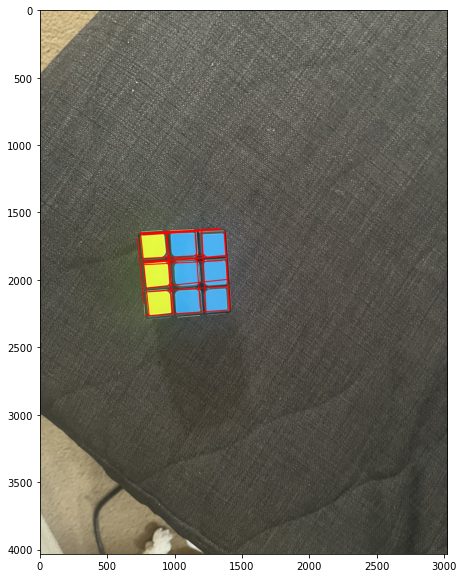

In [16]:
rho = 1
theta = np.pi/180
threshold = 110
min_line_length = 450
max_line_gap = 400
line_image = np.copy(image)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.figure(figsize=(10,10))
plt.imshow(line_image)
len(lines)

In [18]:
for i, j in lines:
    print(i, j)

ValueError: not enough values to unpack (expected 2, got 1)

In [6]:
len(lines)

23

In [11]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, image = cap.read()
    image = cv2.resize(image, (250, 150), interpolation = cv2.INTER_AREA)
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    low_threshold = 50
    high_threshold = 100
    edges = cv2.Canny(blur, low_threshold, high_threshold)
    rho = 1
    theta = np.pi/180
    threshold = 70
    min_line_length = 30
    max_line_gap = 10
    line_image = np.copy(edges)
    cline_imagegray = cv2.cvtColor(line_image, cv2.COLOR_GRAY2RGB)
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
    
    try:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(cline_imagegray,(x1,y1),(x2,y2),(0,0,255),2)
    except:
        cv2.imshow('frame', cline_imagegray)
        cv2.waitKey(1)
        continue
    cv2.imshow('frame', cline_imagegray)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
cap = cv2.VideoCapture(1)
ret, image = cap.read()

In [12]:
cv2.imshow('frame', image)
cv2.waitKey(1)

-1

In [9]:
image = cv2.resize(image, (250, 150), interpolation = cv2.INTER_AREA)

In [50]:
line_image.shape

(150, 250)